In [234]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [235]:
data0=pd.read_csv("Used Car Info.csv")

In [236]:
data0.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [101]:
# eliminate the column that is relatively irrelevant and difficult to analyze

In [237]:
data1=data0.drop(["Model"],axis=1)

In [238]:
data1.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [239]:
data2=data1.dropna(axis=0)

In [240]:
data2.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [241]:
# deal with each individual column

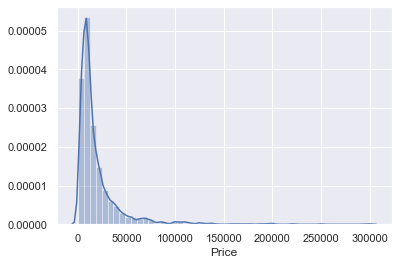

In [246]:
sns.distplot(data2["Price"])

In [247]:
q1=data2["Price"].quantile(0.95)

In [248]:
data3=data2[data2["Price"]<q1]

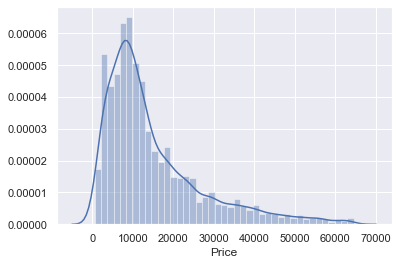

In [249]:
sns.distplot(data3["Price"])

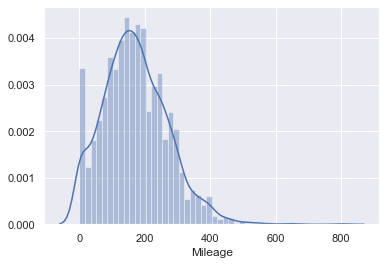

In [250]:
sns.distplot(data3["Mileage"])

In [251]:
q2=data3["Mileage"].quantile(0.95)

In [252]:
data4=data3[data3["Mileage"]<q2]

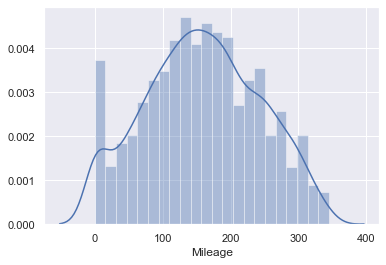

In [253]:
sns.distplot(data4["Mileage"])

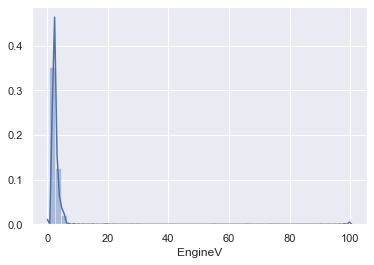

In [254]:
sns.distplot(data4["EngineV"])

In [255]:
data5=data4[data4['EngineV']<5]

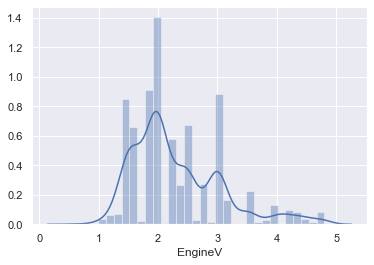

In [256]:
sns.distplot(data5["EngineV"])

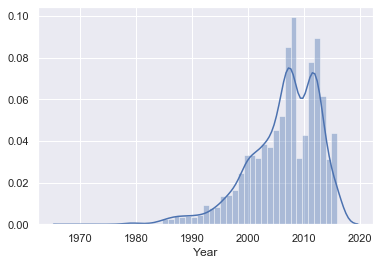

In [257]:
sns.distplot(data5["Year"])

In [258]:
q3=data5["Year"].quantile(0.05)

In [259]:
data6=data5[data5["Year"]>q3]

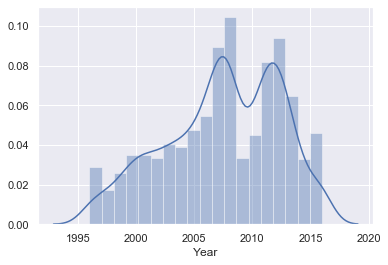

In [260]:
sns.distplot(data6["Year"])

In [261]:
data6.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3300,3300.000000,3300,3300.000000,3300.000000,3300,3300,3300.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,769,NaN,1192,NaN,NaN,1590,2974,NaN
mean,NaN,15665.410624,NaN,155.398182,2.315015,NaN,NaN,2007.428788
std,NaN,12025.501213,NaN,82.037366,0.765426,NaN,NaN,4.906531
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1996.000000
25%,NaN,7700.000000,NaN,97.000000,1.800000,NaN,NaN,2004.000000
50%,NaN,11750.000000,NaN,155.000000,2.000000,NaN,NaN,2008.000000
75%,NaN,19999.000000,NaN,215.000000,2.800000,NaN,NaN,2012.000000


In [262]:
# create the relation chart between column "price" and other three Numeric columns: "Year", "EngineV", "Mileage"

In [263]:
data6.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3300,3300.000000,3300,3300.000000,3300.000000,3300,3300,3300.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,769,NaN,1192,NaN,NaN,1590,2974,NaN
mean,NaN,15665.410624,NaN,155.398182,2.315015,NaN,NaN,2007.428788
std,NaN,12025.501213,NaN,82.037366,0.765426,NaN,NaN,4.906531
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1996.000000
25%,NaN,7700.000000,NaN,97.000000,1.800000,NaN,NaN,2004.000000
50%,NaN,11750.000000,NaN,155.000000,2.000000,NaN,NaN,2008.000000
75%,NaN,19999.000000,NaN,215.000000,2.800000,NaN,NaN,2012.000000


In [264]:
# create relation chart that between column "Price" and other three that exclude "Brand"

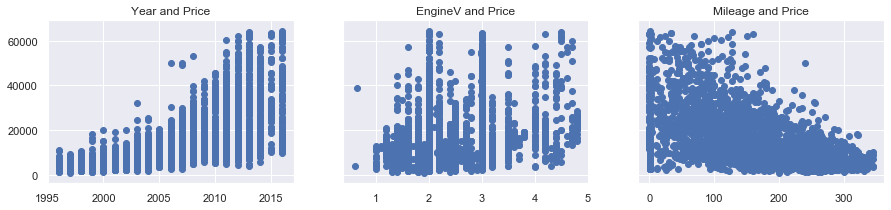

In [265]:
f, (ax1, ax2, ax3)=plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data6["Year"],data6["Price"])
ax1.set_title("Year and Price")
ax2.scatter(data6["EngineV"],data6["Price"])
ax2.set_title("EngineV and Price")
ax3.scatter(data6["Mileage"],data6["Price"])
ax3.set_title("Mileage and Price")
plt.show()

In [266]:
# revise the relation charts

In [267]:
log_price=np.log(data6["Price"])
data6["Log Price"]=log_price

C:\Users\caiyangpipo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


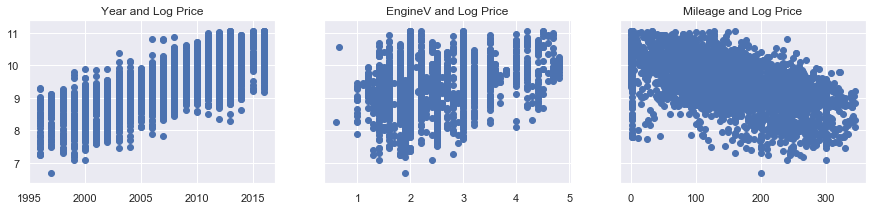

In [268]:
f, (ax1, ax2, ax3)=plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data6["Year"],data6["Log Price"])
ax1.set_title("Year and Log Price")
ax2.scatter(data6["EngineV"],data6["Log Price"])
ax2.set_title("EngineV and Log Price")
ax3.scatter(data6["Mileage"],data6["Log Price"])
ax3.set_title("Mileage and Log Price")
plt.show()

In [269]:
data7=data6.drop(["Price"],axis=1)

In [270]:
data7.describe(include="all")

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
count,3300,3300,3300.000000,3300.000000,3300,3300,3300.000000,3300.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,769,1192,NaN,NaN,1590,2974,NaN,NaN
mean,NaN,NaN,155.398182,2.315015,NaN,NaN,2007.428788,9.393433
std,NaN,NaN,82.037366,0.765426,NaN,NaN,4.906531,0.745812
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1996.000000,6.684612
25%,NaN,NaN,97.000000,1.800000,NaN,NaN,2004.000000,8.948976
50%,NaN,NaN,155.000000,2.000000,NaN,NaN,2008.000000,9.371609
75%,NaN,NaN,215.000000,2.800000,NaN,NaN,2012.000000,9.903438


In [271]:
# check multicollinearity

In [272]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [273]:
var=data7[["Mileage","EngineV","Year"]]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(var.values,i) for i in range (var.shape[1])]
vif["Columns"]=var.columns

In [274]:
vif

,VIF,Columns
0,4.632986,Mileage
1,10.291103,EngineV
2,12.427851,Year


In [275]:
# deal with the categorical values 

In [276]:
data8=pd.get_dummies(data7,drop_first=True)

In [277]:
data8.describe(include="all")

,Mileage,EngineV,Year,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,155.398182,2.315015,2007.428788,9.393433,0.150606,0.157273,0.086667,0.128182,0.137879,0.233030,0.068182,0.096061,0.361212,0.104848,0.170606,0.146970,0.025758,0.345455,0.901212
std,82.037366,0.765426,4.906531,0.745812,0.357719,0.364113,0.281389,0.334343,0.344825,0.422825,0.252096,0.294719,0.480425,0.306405,0.376221,0.354129,0.158435,0.475588,0.298422
min,0.000000,0.600000,1996.000000,6.684612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97.000000,1.800000,2004.000000,8.948976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,155.000000,2.000000,2008.000000,9.371609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,215.000000,2.800000,2012.000000,9.903438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,345.000000,4.800000,2016.000000,11.074421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [278]:
data8.columns.values

array(['Mileage', 'EngineV', 'Year', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [280]:
# prepare linear regression 

In [281]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [282]:
y=data8["Log Price"]

In [283]:
x=data8.drop(["Log Price"],axis=1)

In [284]:
scaler=StandardScaler()

In [285]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [286]:
x_scaled=scaler.transform(x)

In [287]:
# create the train/test set

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=365)

In [290]:
# create the linear regression

In [291]:
reg=LinearRegression()

In [292]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [293]:
reg.score(x_train,y_train)

0.8675904812402492

In [294]:
reg.intercept_

9.39260447563425

In [295]:
reg.coef_

array([-0.06040761,  0.19543459,  0.44349597,  0.02500078, -0.00781466,
       -0.13017003, -0.2032729 , -0.07249982, -0.0953305 , -0.0782951 ,
       -0.05740648, -0.10847382, -0.08260008, -0.14303187, -0.03349794,
       -0.01297141, -0.04503032,  0.24626266])

In [296]:
reg_summary=pd.DataFrame()
reg_summary["Weights"]=reg.coef_
reg_summary["Features"]=x.columns.values
reg_summary

,Weights,Features
0,-0.060408,Mileage
1,0.195435,EngineV
2,0.443496,Year
3,0.025001,Brand_BMW
4,-0.007815,Brand_Mercedes-Benz
5,-0.130170,Brand_Mitsubishi
6,-0.203273,Brand_Renault
7,-0.072500,Brand_Toyota
8,-0.095330,Brand_Volkswagen
9,-0.078295,Body_hatch


In [297]:
# validate the model by testing

In [298]:
y_hat=reg.predict(x_test)

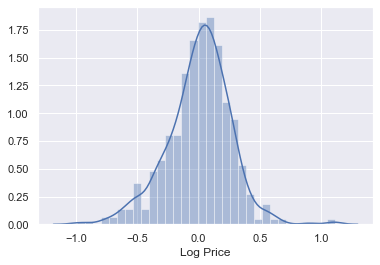

In [299]:
sns.distplot(y_test-y_hat)

In [300]:
y_test=y_test.reset_index(drop=True)

In [306]:
test_summary=pd.DataFrame()
test_summary["Prediction"]=np.exp(y_hat)
test_summary["Real Result"]=
test_summary["Residual"]=np.exp(y_test)-np.exp(y_hat)

In [310]:
test_summary["Difference%"]=np.absolute(test_summary["Residual"]/np.exp(y_test)*100)

In [312]:
test_summary.describe()

,Prediction,Real Result,Residual,Difference%
count,660.000000,660.000000,660.000000,660.000000
mean,14573.367247,15313.083758,739.716510,20.378649
std,9452.024028,11794.455597,4923.030340,20.300320
min,1262.332498,1400.000000,-15573.642182,0.004164
25%,7656.565762,7500.000000,-1382.037647,6.604434
50%,12081.902064,11499.500000,254.146604,14.687039
75%,19775.548182,18999.000000,2017.769048,26.352869
max,51462.344743,64000.000000,37241.006807,170.902066
